In [55]:
import sys
import pandas as pd
import plotnine as pn

In [56]:
# load data

# ratio_fns = {
#     f"{ratio}": f"/Users/nathanielimel/clms/projects/modals-effcomm/outputs/cogsci/base/weighted_utility_linear_search/ratio={ratio}/means.csv"
#     for ratio in [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
# }

predictor = "prior"
# predictor = "utility"


ratio_fns = {
    f"{ratio}": f"/Users/nathanielimel/clms/projects/modals-effcomm/outputs/cogsci/base/weighted_{predictor}_linear_search/ratio={ratio}/means.csv"
    for ratio in [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
}

ratio_dataframes = {
    key: pd.read_csv(value) for key, value in ratio_fns.items()
}



In [16]:
# load data

# ratio_fns = {
#     "1": "/Users/nathanielimel/clms/projects/modals-effcomm/outputs/cogsci/base/weighted_utility_linear_search/ratio=1/means.csv",
#     "2": "/Users/nathanielimel/clms/projects/modals-effcomm/outputs/cogsci/base/weighted_utility_linear_search/ratio=2/means.csv",
#     "4": "/Users/nathanielimel/clms/projects/modals-effcomm/outputs/cogsci/base/weighted_utility_linear_search/ratio=4/means.csv",
#     "8": "/Users/nathanielimel/clms/projects/modals-effcomm/outputs/cogsci/base/weighted_utility_linear_search/ratio=8/means.csv",
#     "16": "/Users/nathanielimel/clms/projects/modals-effcomm/outputs/cogsci/base/weighted_utility_linear_search/ratio=16/means.csv",
# }

# ratio_dataframes = {
#     key: pd.read_csv(value) for key, value in ratio_fns.items()
# }



In [63]:
# add ratio variable
for key in ratio_dataframes:
    df = ratio_dataframes[key]
    # df["ratio"] = 10 ** float(key)
    df["ratio"] = int(key)


# concat
ratio_data = pd.concat(ratio_dataframes.values())
ratio_data

,Unnamed: 0,complexity,comm_cost,optimality,N,ratio
0,cogsci universal true,45.141316,0.505579,0.765278,132122,1
1,cogsci universal false,38.576815,0.617530,0.779214,28699,1
2,population,43.969861,0.525557,0.767765,160821,1
0,cogsci universal true,45.141316,0.501545,0.763751,132122,2
1,cogsci universal false,38.576815,0.654259,0.772246,28699,2
2,population,43.969861,0.528797,0.765267,160821,2
0,cogsci universal true,45.141316,0.498855,0.759931,132122,3
1,cogsci universal false,38.576815,0.678745,0.768174,28699,3
2,population,43.969861,0.530957,0.761402,160821,3
0,cogsci universal true,45.141316,0.496934,0.758332,132122,4


In [64]:
# do below but for deontic priority

population_data = ratio_data[ratio_data["Unnamed: 0"] == "population"]

# remove population since is constant
# ratio_data = ratio_data[ratio_data["Unnamed: 0"].isin(["Deontic Priority true", "Deontic Priority false"])]
ratio_data = ratio_data[ratio_data["Unnamed: 0"].isin(["cogsci universal true", "cogsci universal false"])]

display(ratio_data)
display(population_data)

,Unnamed: 0,complexity,comm_cost,optimality,N,ratio
0,cogsci universal true,45.141316,0.505579,0.765278,132122,1
1,cogsci universal false,38.576815,0.617530,0.779214,28699,1
0,cogsci universal true,45.141316,0.501545,0.763751,132122,2
1,cogsci universal false,38.576815,0.654259,0.772246,28699,2
0,cogsci universal true,45.141316,0.498855,0.759931,132122,3
1,cogsci universal false,38.576815,0.678745,0.768174,28699,3
0,cogsci universal true,45.141316,0.496934,0.758332,132122,4
1,cogsci universal false,38.576815,0.696235,0.766080,28699,4
0,cogsci universal true,45.141316,0.495494,0.757540,132122,5
1,cogsci universal false,38.576815,0.709352,0.767538,28699,5


,Unnamed: 0,complexity,comm_cost,optimality,N,ratio
2,population,43.969861,0.525557,0.767765,160821,1
2,population,43.969861,0.528797,0.765267,160821,2
2,population,43.969861,0.530957,0.761402,160821,3
2,population,43.969861,0.532500,0.759715,160821,4
2,population,43.969861,0.533657,0.759324,160821,5
2,population,43.969861,0.534557,0.757405,160821,6
2,population,43.969861,0.535277,0.756664,160821,7
2,population,43.969861,0.535866,0.755679,160821,8
2,population,43.969861,0.536357,0.755190,160821,9
2,population,43.969861,0.536773,0.754903,160821,10


In [65]:
# rename columns to more sensible labels
# ratio_data["Deontic Priority"] = ratio_data["Unnamed: 0"] == "Deontic Priority true"
ratio_data["Deontic Priority"] = ratio_data["Unnamed: 0"] == "cogsci universal true"

ratio_data = ratio_data[["ratio", "Deontic Priority", "optimality"]].reset_index()
ratio_data = ratio_data.drop(columns=["index"])
ratio_data

/var/folders/3z/q1pyp9n929z2nh_1_69s7y_40000gn/T/ipykernel_25427/1473202708.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,ratio,Deontic Priority,optimality
0,1,True,0.765278
1,1,False,0.779214
2,2,True,0.763751
3,2,False,0.772246
4,3,True,0.759931
5,3,False,0.768174
6,4,True,0.758332
7,4,False,0.766080
8,5,True,0.757540
9,5,False,0.767538


In [20]:
# # create a separate df for the population
# population_data = ratio_data[ratio_data["name"] == "population_means"]

# # remove population since is constant
# ratio_data = ratio_data[ratio_data["name"].isin(["uegaki_true", "uegaki_false"])]

# display(ratio_data)
# display(population_data)

In [21]:
# # rename columns to more sensible labels
# ratio_data["uegaki"] = ratio_data["name"] == "uegaki_true"

# ratio_data = ratio_data[["ratio", "uegaki", "optimality"]].reset_index()
# ratio_data = ratio_data.drop(columns=["index"])
# ratio_data

In [22]:
# # rename to the Deontic Priority generalization
# ratio_data["Deontic Priority"] = ratio_data["uegaki"]

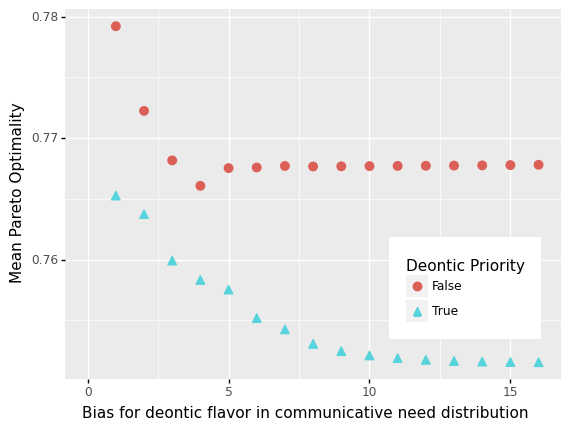

In [66]:
# get a basic plot

plot = (
    pn.ggplot(data=ratio_data, mapping=pn.aes(x="ratio", y="optimality"))
    + pn.geom_point(
    # + pn.geom_line(
        data=ratio_data,
        mapping=pn.aes(shape="Deontic Priority", color="Deontic Priority"),
        size=3,
    )
    + pn.xlim(0, 16)
    + pn.xlab("Bias for deontic flavor in communicative need distribution")
    # + pn.xlab("Bias for deontic flavor in communicative utility function")    
    + pn.ylab("Mean Pareto Optimality")
    + pn.theme(legend_position=(0.75, 0.3))
)
print(plot)

In [43]:
# save
fn = f"/Users/nathanielimel/clms/projects/modals-effcomm/outputs/cogsci/base/weighted_{predictor}_linear_search/ratio_vs_opt.png"
plot.save(filename=fn, width=10, height=10, dpi=300)


/Users/nathanielimel/miniforge3/envs/modals-effcomm/lib/python3.10/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 10 x 10 in image.
/Users/nathanielimel/miniforge3/envs/modals-effcomm/lib/python3.10/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: /Users/nathanielimel/clms/projects/modals-effcomm/outputs/cogsci/base/weighted_prior_linear_search/ratio_vs_opt.png


## Regression

In [67]:
# compute regression of difference in mean optimality against the weight for each utility / (prior)
import numpy as np
from scipy.stats import linregress

dp_obeying = ratio_data[ratio_data["Deontic Priority"] == True]
dp_disobeying = ratio_data[ratio_data["Deontic Priority"] == False]

differences = np.array(dp_obeying["optimality"]) - np.array(dp_disobeying["optimality"])

result = linregress(range(1, 16+1), differences)
result

LinregressResult(slope=-0.0005333366060714103, intercept=-0.008973209455156828, rvalue=-0.8087784376012654, pvalue=0.0001487018542775217, stderr=0.00010364990970141576, intercept_stderr=0.0010022469274255414)